# Effect sizes

Effect sizes are a way of quantifying the magnitude of the difference between two groups. They are useful to determine the sample size for follow-up studies, or examining effects across studies. In this tutorial, we will see how to compute effect sizes using Pingouin.

The effect sizes supported in Pingouin are:

-  Cohen's d for independent measures
-  Cohen's d-average for repeated measures
-  Hedges' g (corrected Cohen d, better for small sample size)
-  Glass delta (more appropriate when the two measures have different variance, e.g. controls vs patients)
-  Eta-square
-  Odds-ratio
-  Area Under the Curve (AUC)

## Example

We'll start by generating a fake demographic dataset representing the heights of 500 individuals in two countries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

np.random.seed(123)
nx, ny = 500, 500
x = np.random.normal(loc=174, size=nx) # mean = 174 cm, variance = 1
y = np.random.normal(loc=175, size=ny) # mean = 175 cm, variance = 1

Let's visualize the distribution of our two datasets using [seaborn](https://seaborn.pydata.org/)

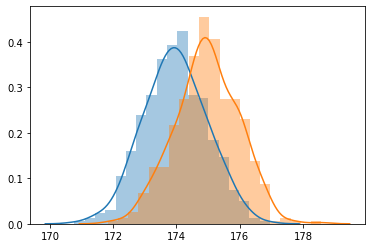

In [2]:
sns.distplot(x, kde=True, label='France')
sns.distplot(y, kde=True, label='UK')

Now we can compute the effect size using the [compute_effsize](https://pingouin-stats.org/generated/pingouin.compute_effsize.html#pingouin.compute_effsize) function:

In [3]:
from pingouin import compute_effsize
eftype = 'hedges' # 'cohen', 'hedges', 'glass', 'eta-square', 'odds-ratio', 'AUC'
ef = compute_effsize(x=x, y=y, eftype=eftype, paired=False)
print(eftype, ': %.3f' % ef)

hedges : -0.996


### Using a T-value
If you don't have the raw data,  effect size can be computed from a T-value and sample size:

In [4]:
from pingouin import compute_effsize_from_t
# using a T-value when nx and ny are known
tval, _ = ttest_ind(x, y)
ef = compute_effsize_from_t(tval, nx=len(x), ny=len(y), eftype=eftype)
print(eftype, '(from T - nx + ny): %.3f' % ef)

# using a T-value when only total sample size is known
tval, _ = ttest_ind(x, y)
ef = compute_effsize_from_t(tval, N=len(x) + len(y), eftype='cohen')
print('cohen (from T - only N): %.3f' % ef)

hedges (from T - nx + ny): -0.996
cohen (from T - only N): -0.996


## Confidence intervals
Parametric and bootstrapped confidence intervals of effect sizes and correlation coefficients can be computed using the [compute_esci](https://pingouin-stats.org/generated/pingouin.compute_esci.html#pingouin.compute_esci) and [compute_bootci](https://pingouin-stats.org/generated/pingouin.compute_bootci.html#pingouin.compute_bootci) functions, respectively. The former method only requires the original effect sizes and sample sizes, while the latter method requires the raw values.

In [5]:
from pingouin import compute_esci, compute_bootci

# Cohen's d
d = compute_effsize(x, y, eftype='cohen')
print('Cohen d:\t%.3f' % d)

# Parametric 95% confidence intervals of Cohen's d effect size
print('Parametric:\t', compute_esci(stat=d, nx=nx, ny=ny, confidence=0.95, eftype='cohen'))

# Bootstrapped 95% confidence intervals of Cohen's d effect size
print('Bootstrapped:\t', compute_bootci(x=x, y=y, func='cohen', confidence=0.95, n_boot=2000, seed=123))

Cohen d:	-0.996
Parametric:	 [-1.13 -0.86]
Bootstrapped:	 [-1.13 -0.87]


## Converting effect sizes
It is possible to convert between several types of effect sizes using the [convert_effsize](https://pingouin-stats.org/generated/pingouin.convert_effsize.html#pingouin.convert_effsize) function:

In [6]:
from pingouin import convert_effsize
# Convert from Cohen's d to eta-square:
eta = convert_effsize(ef=d, input_type='cohen', output_type='eta-square')
print('Eta:\t%.3f' % eta)

# Convert from Cohen's d to hedges (requires sample size):
hedges = convert_effsize(ef=d, input_type='cohen', output_type='hedges', nx=500, ny=500)
print('Hedges:\t%.3f' % hedges)

Eta:	0.199
Hedges:	-0.996
